In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx", sheet_name=1, header=0)
display(df.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [ ]:
experience_mean = df[df['Experience'] >= 0]['Experience'].mean()
df['Experience'] = df['Experience'].apply(lambda x: experience_mean if x < 0 else x)

df = pd.get_dummies(df, columns=['Education'], prefix='Education')
display(df.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1.0,49,91107,4,1.6,0,0,1,0,0,0,True,False,False
1,2,45,19.0,34,90089,3,1.5,0,0,1,0,0,0,True,False,False
2,3,39,15.0,11,94720,1,1.0,0,0,0,0,0,0,True,False,False
3,4,35,9.0,100,94112,1,2.7,0,0,0,0,0,0,False,True,False
4,5,35,8.0,45,91330,4,1.0,0,0,0,0,0,1,False,True,False


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.331043,73.774200,93152.503000,2.396400,1.937913,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.252985,46.033729,2121.852197,1.147663,1.747666,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.331043,64.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Text(0.5, 1.0, 'Income Distribution')

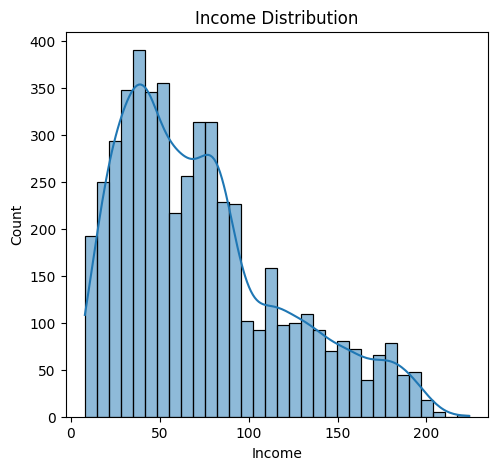

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')

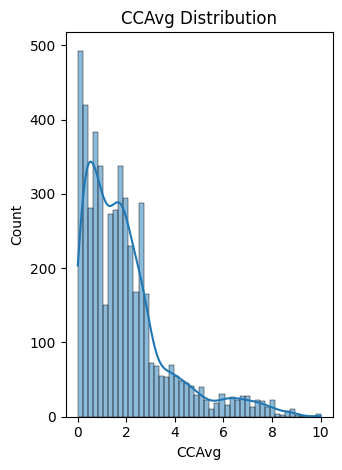

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['CCAvg'], kde=True)
plt.title('CCAvg Distribution')
plt.tight_layout()
plt.show()

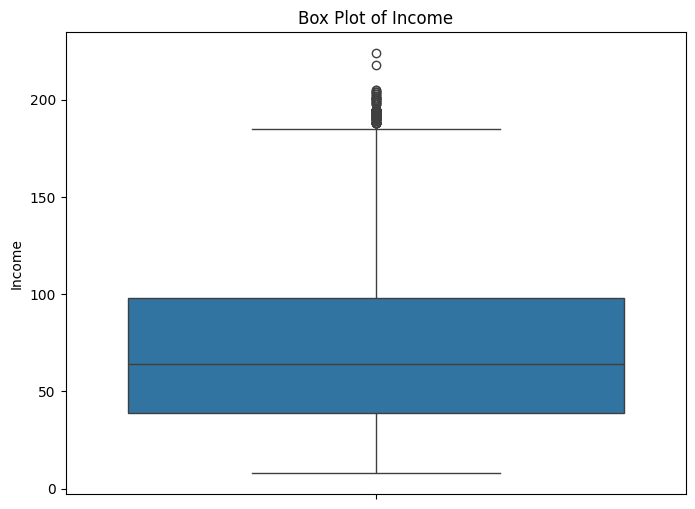

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Income'])
plt.title('Box Plot of Income')
plt.show()

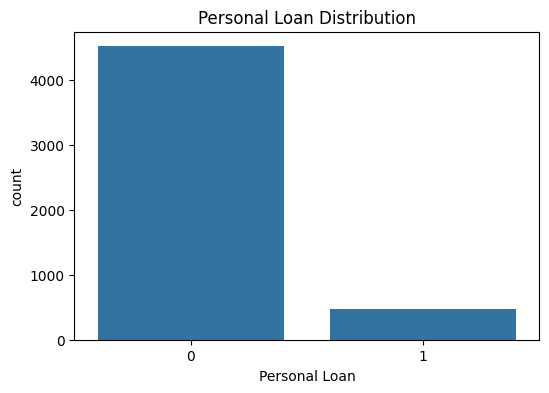

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal Loan', data=df)
plt.title('Personal Loan Distribution')
plt.show()

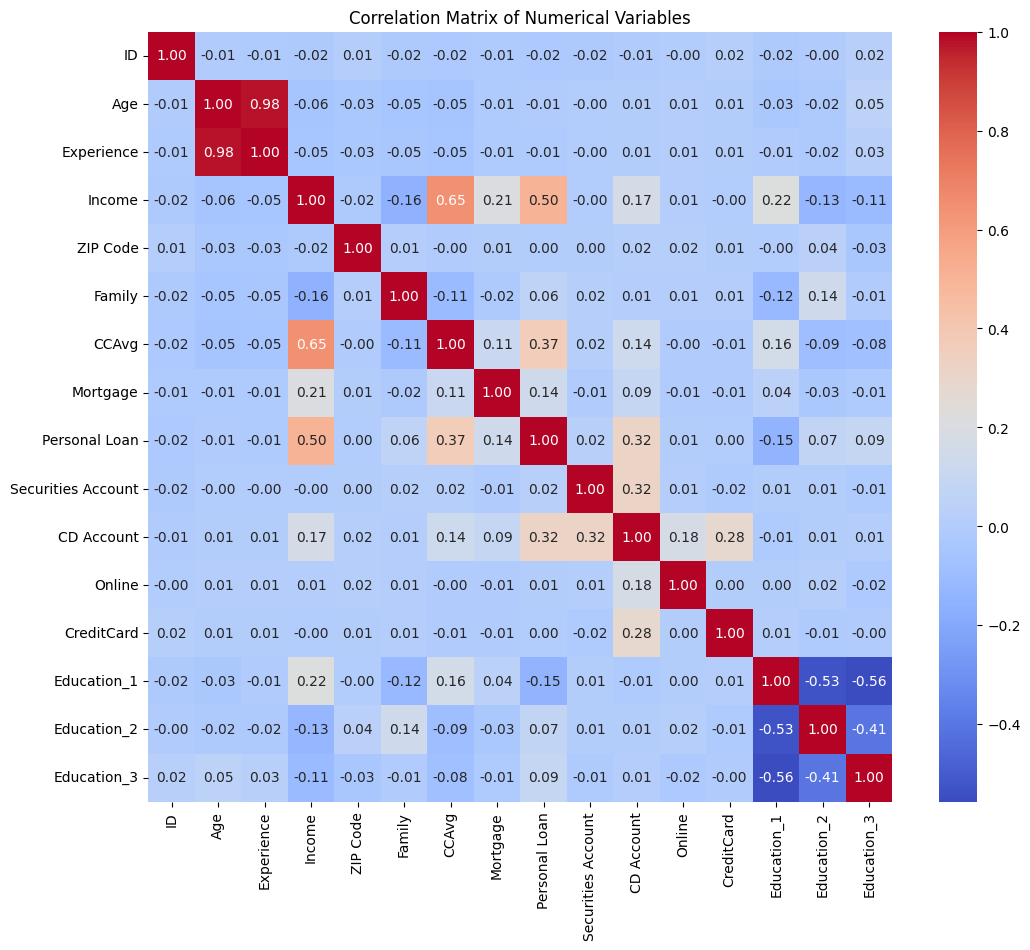

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, f_oneway

chi2_results = {}
for col in ['Education_1', 'Education_2', 'Education_3']:
    contingency_table = pd.crosstab(df[col], df['Personal Loan'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p-value': p}

print("Chi-squared test results for Education vs. Personal Loan:")
for col, result in chi2_results.items():
    print(f"{col}: chi2-statistic={result['chi2']:.4f}, p-value={result['p-value']:.4f}")

loan_accepted = df[df['Personal Loan'] == 1]
loan_not_accepted = df[df['Personal Loan'] == 0]

f_statistic_income, p_value_income = f_oneway(loan_accepted['Income'], loan_not_accepted['Income'])
f_statistic_ccavg, p_value_ccavg = f_oneway(loan_accepted['CCAvg'], loan_not_accepted['CCAvg'])

print("\nANOVA test results:")
print(f"Income vs. Personal Loan: F-statistic={f_statistic_income:.4f}, p-value={p_value_income:.4f}")
print(f"CCAvg vs. Personal Loan: F-statistic={f_statistic_ccavg:.4f}, p-value={p_value_ccavg:.4f}")

Chi-squared test results for Education vs. Personal Loan:
Education_1: chi2-statistic=109.8254, p-value=0.0000
Education_2: chi2-statistic=25.0177, p-value=0.0000
Education_3: chi2-statistic=40.0255, p-value=0.0000

ANOVA test results:
Income vs. Personal Loan: F-statistic=1688.0046, p-value=0.0000
CCAvg vs. Personal Loan: F-statistic=777.4218, p-value=0.0000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

X = df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9670
ROC-AUC Score: 0.8681
Confusion Matrix:
[[889   6]
 [ 27  78]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Key Findings
- The dataset is imbalanced, with only 9.6% of customers having accepted a personal loan.
- **Income** and **CCAvg** are the strongest numerical predictors of loan acceptance. The ANOVA test for both variables yielded a p-value of 0.0000, indicating a significant difference in means between customers who accepted a loan and those who did not.
- **Education level** is a significant categorical predictor, as confirmed by a Chi-squared test with a p-value of 0.0000.
- The Logistic Regression model achieved an accuracy of 96.70% and an ROC-AUC score of 0.8681, demonstrating strong predictive power.
- The model correctly identified 78 out of 105 customers who accepted the loan in the test set but also had 27 false negatives (customers who accepted the loan but were predicted not to).

### Insights or Next Steps
- **Targeted Marketing Campaigns:** The identified high-risk segments and risk rules can be used to create highly targeted marketing campaigns, potentially increasing the conversion rate for personal loan offers while optimizing marketing spend.
- **Model Refinement:** To reduce the number of false negatives (missed opportunities), further model tuning could be beneficial. Techniques like addressing the class imbalance (e.g., using SMOTE) or exploring more complex models (e.g., Gradient Boosting) could improve the model's ability to identify all potential loan acceptors.

**What are some suggested risk rules for QuantLake Lending?**
The following risk rules can be used to identify high-potential customers for personal loan offers:
-   **Rule 1 (Primary Target):** Target customers with an `Income` > \\$100,000 AND `Education` = 'Graduate/Professional'.
-   **Rule 2 (Secondary Target):** Target customers with `CCAvg` > \\$3,000 AND `Income` > \\$80,000.
-   **Rule 3 (Tertiary Target):** Target customers with a `CD Account` = 1 (Yes) AND `Income` > \\$80,000.

